# Water Maze
https://github.com/vjann/DLC

### Description:
INSERT DESCRIPTION HERE

## Create a new project

Keep the projects separate. This function creates a new project with subdirectories and a basic configuration file under DeepLabCut directory.
You can add new videos to the project at any stage of the project. 

In [1]:
import datetime
import deeplabcut
from time import sleep

In [3]:
task='watermaze' # Enter the name of your experiment Task
experimenter='vj' # Enter the name of the experimenter
video=[r"C:\Users\vjj14\Downloads\watermazevideos\50909.mp4", r"C:\Users\vjj14\Downloads\watermazevideos\50911.mp4"] # Enter the paths of your videos you want to grab frames from.
path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory= r'C:\Users\vjj14\Desktop\DeepLabCut') #change the working directory to where you want the folders created.
# The function returns the path, where your project is. 

Created "C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\videos"
Created "C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\labeled-data"
Created "C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\training-datasets"
Created "C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models"
Creating the symbolic link of the video
Created the symlink of C:\Users\vjj14\Downloads\watermazevideos\50909.mp4 to C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\videos\50909.mp4
Created the symlink of C:\Users\vjj14\Downloads\watermazevideos\50911.mp4 to C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\videos\50911.mp4
C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\videos\50909.mp4
C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\videos\50911.mp4
Generated "C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\config.yaml"

A new project with name watermaze-vj-2019-07-02 is created at C:\Users\vjj14\Desktop\DeepLabCut and a 

In [2]:
path_config_file=r"C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\config.yaml"
project_name='watermaze'
def write_log(text, new_line=True):
    time_log= open("{0}log{1}.txt".format(path_config_file[:-11], project_name),"a+")
    if new_line:
        time_log.write("\n")
    time_log.write(text)
    time_log.close()
    print("log written")
    
def prompt_with_timeout(prompt_message):
  print('Waiting... please press Ctrl-C when you wish to proceed.')
  try:
    for i in range(0, 2*60): # 2 minutes
      sleep(1)
    return "No Input Received"
  except KeyboardInterrupt:
    return input(prompt_message)

## Extract frames from videos 
Select diverse frames, which are typical for the behavior you study that should be labeled.
(algo=='uniform') selects N frames either uniformly sampled from a particular video (or folder) . Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.
Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later, crop the frames to remove unnecessary parts.
Always check the output of cropping.

In [9]:
start = datetime.datetime.now()
write_log(str(start) + "***extract_frames start")

%matplotlib inline
deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=False) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 

end = datetime.datetime.now()
write_log(str(end) + "***extract_frames end")
write_log("   time elapsed:" + str(end-start))
write_log("     " + prompt_with_timeout("number of frames selected?") + "frames labeled")

log written
Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\vjj14\Downloads\watermazevideos\50909.mp4 ?
yes/noyes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 65.43  seconds.
Do you want to extract (perhaps additional) frames for video: C:\Users\vjj14\Downloads\watermazevideos\50911.mp4 ?
yes/noyes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 65.46  seconds.

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).
log written
log written
Waiting... please press Ctrl-C when you wish to proceed.
number of frames selected?50
log written


## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [10]:
start = datetime.datetime.now()
write_log(str(start) + "***label_frames start")

%gui wx
deeplabcut.label_frames(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***label_frames end")
write_log("   time elapsed:" + str(end-start))

log written
You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.
log written
log written


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. 

In [10]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by vj.
C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p_labeled  already exists!
They are stored in the following folder: C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p_labeled.
Attention: C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p does not appear to have labeled data!
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

In [11]:
start = datetime.datetime.now()
write_log(str(start) + "***create_training_dataset start")

deeplabcut.create_training_dataset(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***create_training_dataset end")
write_log("   time elapsed:" + str(end-start))

log written
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
log written
log written


In [6]:
?deeplabcut.create_training_dataset

## Start training - If you want to use a CPU, continue. 
### If you want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [3]:
start = datetime.datetime.now()
write_log(str(start) + "***train_network start")
write_log("   DESCRIPTION:" + prompt_with_timeout("Training description(Network, Iterations, etc) "))

deeplabcut.train_network(path_config_file, saveiters=100, displayiters=50, maxiters=10001)

end = datetime.datetime.now()
write_log(str(end) + "***train_network end")
write_log("   time elapsed:" + str(end-start))

log written
Waiting... please press Ctrl-C when you wish to proceed.
Training description(Network, Iterations, etc) same
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

INFO:tensorflow:Restoring parameters from C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt
Max_iters overwritten as 10001
Display_iters overwritten as 50
Save_iters overwritten as 100
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\vjj14\\Desktop\\DeepLabCut\\watermaze-vj-2019-07-02\\dlc-models\\iteration-0\\watermazeJul2-trainset90shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'd

iteration: 50 loss: 0.0662 lr: 0.005
iteration: 100 loss: 0.0123 lr: 0.005
iteration: 150 loss: 0.0089 lr: 0.005
iteration: 200 loss: 0.0075 lr: 0.005
iteration: 250 loss: 0.0068 lr: 0.005
iteration: 300 loss: 0.0071 lr: 0.005
iteration: 350 loss: 0.0066 lr: 0.005
iteration: 400 loss: 0.0052 lr: 0.005
iteration: 450 loss: 0.0063 lr: 0.005
iteration: 500 loss: 0.0053 lr: 0.005
iteration: 550 loss: 0.0054 lr: 0.005
iteration: 600 loss: 0.0045 lr: 0.005
iteration: 650 loss: 0.0052 lr: 0.005
iteration: 700 loss: 0.0046 lr: 0.005
iteration: 750 loss: 0.0041 lr: 0.005
iteration: 800 loss: 0.0052 lr: 0.005
iteration: 850 loss: 0.0051 lr: 0.005
iteration: 900 loss: 0.0051 lr: 0.005
iteration: 950 loss: 0.0044 lr: 0.005
iteration: 1000 loss: 0.0040 lr: 0.005
iteration: 1050 loss: 0.0041 lr: 0.005
iteration: 1100 loss: 0.0044 lr: 0.005
iteration: 1150 loss: 0.0039 lr: 0.005
iteration: 1200 loss: 0.0038 lr: 0.005
iteration: 1250 loss: 0.0041 lr: 0.005
iteration: 1300 loss: 0.0036 lr: 0.005
iterat

KeyboardInterrupt: 

In [18]:
?deeplabcut.train_network

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [4]:
start = datetime.datetime.now()
write_log(str(start) + "***evaluate_network start")

deeplabcut.evaluate_network(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***evaluate_network end")
write_log("   time elapsed:" + str(end-start))

log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Running  DeepCut_resnet50_watermazeJul2shuffle1_2000  with # of trainingiterations: 2000
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Analyzing data...


50it [00:02, 18.05it/s]


Done and results stored for snapshot:  snapshot-2000
Results for 2000  training iterations: 90 1 train error: 3.06 pixels. Test error: 3.25  pixels.
With pcutoff of 0.1  train error: 3.06 pixels. Test error: 3.25 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)
log written
log written


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [6]:
# videofile_path = [r"C:\Users\vjj14\Downloads\compressed25.mp4"] #Enter the list of videos to analyze.
videos=[[r"C:\Users\vjj14\Downloads\watermazevideos\50909.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\50911.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\50944.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\56199.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\56242.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\56244.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\63410.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\63447.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\66019.mp4"], [r"C:\Users\vjj14\Downloads\watermazevideos\66020.mp4"]]
for videofile_path in videos:
    start = datetime.datetime.now()
    write_log(str(start) + "***analyze_videos start")
    write_log("   VIDEO: " + str(videofile_path))

    deeplabcut.analyze_videos(path_config_file,videofile_path, save_as_csv=True)

    end = datetime.datetime.now()
    write_log(str(end) + "***analyze_videos end")
    write_log("   time elapsed:" + str(end-start))

log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\50909.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\50909.mp4
Duration of video [s]:  65.43 , recorded with  28.92 fps!
Overall # of frames:  1892  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1908it [00:43, 45.30it/s]                                                           

Detected frames:  1892


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\50911.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\50911.mp4
Duration of video [s]:  65.46 , recorded with  29.44 fps!
Overall # of frames:  1927  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1938it [00:41, 48.67it/s]                                                           

Detected frames:  1927


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\50944.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\50944.mp4
Duration of video [s]:  69.11 , recorded with  27.09 fps!
Overall # of frames:  1872  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1890it [00:37, 49.46it/s]                                                           

Detected frames:  1872


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\56199.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\56199.mp4
Duration of video [s]:  65.46 , recorded with  28.9 fps!
Overall # of frames:  1892  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1908it [00:42, 46.56it/s]                                                           

Detected frames:  1892


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\56242.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\56242.mp4
Duration of video [s]:  69.19 , recorded with  26.3 fps!
Overall # of frames:  1820  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1836it [00:37, 49.64it/s]                                                           

Detected frames:  1820


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\56244.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\56244.mp4
Duration of video [s]:  65.43 , recorded with  29.36 fps!
Overall # of frames:  1921  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1938it [00:41, 47.26it/s]                                                           

Detected frames:  1921


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\63410.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\63410.mp4
Duration of video [s]:  80.41 , recorded with  22.75 fps!
Overall # of frames:  1829  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1836it [00:39, 48.43it/s]                                                           

Detected frames:  1829


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\63447.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\63447.mp4
Duration of video [s]:  67.47 , recorded with  27.18 fps!
Overall # of frames:  1834  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1836it [00:37, 50.44it/s]                                                           

Detected frames:  1834


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\66019.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\66019.mp4
Duration of video [s]:  68.99 , recorded with  25.97 fps!
Overall # of frames:  1792  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1802it [00:38, 46.18it/s]                                                           

Detected frames:  1792


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written
log written
log written


Config:
{'all_joints': [[0]],
 'all_joints_names': ['mouse'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\watermaze_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_watermazeJul2\\Documentation_data-watermaze_90shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror': Fa

Using snapshot-2000 for model C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\dlc-models\iteration-0\watermazeJul2-trainset90shuffle1\train\snapshot-2000
Starting to analyze %  C:\Users\vjj14\Downloads\watermazevideos\66020.mp4
Loading  C:\Users\vjj14\Downloads\watermazevideos\66020.mp4
Duration of video [s]:  69.11 , recorded with  27.54 fps!
Overall # of frames:  1903  found with (before cropping) frame dimensions:  800 600
Starting to extract posture


1919it [00:38, 48.57it/s]                                                           

Detected frames:  1903


Saving results in C:\Users\vjj14\Downloads\watermazevideos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
log written
log written


In [13]:
?deeplabcut.analyze_videos

 16%|████████████▎                                                                | 2480/15561 [03:30<17:57, 12.14it/s]

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [8]:
alg = 'uncertain'
param = 0.0002 #epsilon or p_bound

start = datetime.datetime.now()
write_log(str(start) + "***extract_outlier_frames start")

deeplabcut.extract_outlier_frames(path_config_file, videofile_path, outlieralgorithm=alg, p_bound=param)
num_frames = prompt_with_timeout("number of frames selected?")
write_log("   VIDEOS: {0}, ALGORITHM: {1}, PARAMETER: {2}, NUM FRAMES: {3}".format(str(videofile_path), alg, param, num_frames))

end = datetime.datetime.now()
write_log(str(end) + "***extract_outlier_frames start")
write_log("   time elapsed:" + str(end-start))

network parameters: DeepCut_resnet50_frontslowmoJun5shuffle1_28000
Method  uncertain  found  12  putative outlier frames.
Do you want to proceed with extracting  200  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes
Frames from video 1080p  already extracted (more will be added)!
Loading video...
Duration of video [s]:  518.6666666666666 , recorded @  30.0 fps!
Overall # of frames:  15560 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 518.7  seconds.
Let's select frames indices: [113, 154, 155, 156, 157, 158, 160, 161, 162, 13116, 13117, 13126]
New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\1080p.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.

In [38]:
?deeplabcut.extract_outlier_frames

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [4]:
start = datetime.datetime.now()
write_log(str(start) + "***refine_frames start")

%gui wx
deeplabcut.refine_labels(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***refine_frames end")
write_log("   time elapsed:" + str(end-start))


ERROR:root:Cannot activate multiple GUI eventloops


Windows
Checking labels if they are outside the image
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Closing... The refined labels are stored in a subdirectory under labeled-data. Use the function 'merge_datasets' to augment the training dataset, and then re-train a network using create_training_dataset followed by train_network!


In [5]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
start = datetime.datetime.now()
write_log(str(start) + "***merge_datasets start")

deeplabcut.merge_datasets(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***merge_datasets end")
write_log("   time elapsed:" + str(end-start))

Merged data sets and updated refinement iteration to 2.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [6]:
start = datetime.datetime.now()
write_log(str(start) + "***create_training_dataset start")

deeplabcut.create_training_dataset(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***create_training_dataset end")
write_log("   time elapsed:" + str(end-start))

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [7]:
for videofile_path in videos:
    start = datetime.datetime.now()
    write_log(str(start) + "***create_labeled_video start")
    write_log("   VIDEOS: {}".format(str(videofile_path)))

    deeplabcut.create_labeled_video(path_config_file,videofile_path)

    end = datetime.datetime.now()
    write_log(str(end) + "***create_labeled_video end")
    write_log("   time elapsed:" + str(end-start))

log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\50909.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\50909.mp4 and data.
False 0 800 0 600
1892
Duration of video [s]:  65.43 , recorded with  28.92 fps!
Overall # of frames:  1892 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1892/1892 [00:07<00:00, 251.14it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\50911.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\50911.mp4 and data.
False 0 800 0 600
1927
Duration of video [s]:  65.46 , recorded with  29.44 fps!
Overall # of frames:  1927 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1927/1927 [00:07<00:00, 246.51it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\50944.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\50944.mp4 and data.
False 0 800 0 600
1872
Duration of video [s]:  69.11 , recorded with  27.09 fps!
Overall # of frames:  1872 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1872/1872 [00:07<00:00, 244.85it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\56199.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\56199.mp4 and data.
False 0 800 0 600
1892
Duration of video [s]:  65.46 , recorded with  28.9 fps!
Overall # of frames:  1892 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1892/1892 [00:07<00:00, 248.32it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\56242.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\56242.mp4 and data.
False 0 800 0 600
1820
Duration of video [s]:  69.19 , recorded with  26.3 fps!
Overall # of frames:  1820 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1820/1820 [00:07<00:00, 262.26it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\56244.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\56244.mp4 and data.
False 0 800 0 600
1921
Duration of video [s]:  65.43 , recorded with  29.36 fps!
Overall # of frames:  1921 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1921/1921 [00:07<00:00, 246.11it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\63410.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\63410.mp4 and data.
False 0 800 0 600
1829
Duration of video [s]:  80.41 , recorded with  22.75 fps!
Overall # of frames:  1829 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1829/1829 [00:07<00:00, 246.27it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\63447.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\63447.mp4 and data.
False 0 800 0 600
1834
Duration of video [s]:  67.47 , recorded with  27.18 fps!
Overall # of frames:  1834 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1834/1834 [00:07<00:00, 250.36it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\66019.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\66019.mp4 and data.
False 0 800 0 600
1792
Duration of video [s]:  68.99 , recorded with  25.97 fps!
Overall # of frames:  1792 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1792/1792 [00:07<00:00, 252.36it/s]


log written
log written
log written
log written
Starting %  C:\Users\vjj14\Downloads\watermazevideos ['C:\\Users\\vjj14\\Downloads\\watermazevideos\\66020.mp4']
Loading  C:\Users\vjj14\Downloads\watermazevideos\66020.mp4 and data.
False 0 800 0 600
1903
Duration of video [s]:  69.11 , recorded with  27.54 fps!
Overall # of frames:  1903 with cropped frame dimensions:  800 600
Generating frames and creating video.


100%|██████████████████████████████████████████| 1903/1903 [00:07<00:00, 249.72it/s]


log written
log written


In [22]:
?deeplabcut.create_labeled_video

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [45]:
videofile_path

['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\frontslowmo-vj-2019-06-05\\videos\\1080p.MOV']

In [ ]:
%matplotlib notebook 
#for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)

In [58]:
?deeplabcut.plot_trajectories

In [3]:
import numpy as np
import pandas as pd

## Pandas analysis of Data

In [59]:
dfs = []
times = []
mouse_number = []
m50909 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\50909DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m50909.columns = m50909.columns.droplevel()
dfs.append(m50909['mouse'])
times.append(65.4)
mouse_number.append(50909)

m50911 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\50911DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m50911.columns = m50911.columns.droplevel()
dfs.append(m50911['mouse'])
times.append(65.45)
mouse_number.append(50911)

m50944 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\50944DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m50944.columns = m50944.columns.droplevel()
dfs.append(m50944['mouse'])
times.append(69.14)
mouse_number.append(50944)

m56199 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\56199DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m56199.columns = m56199.columns.droplevel()
dfs.append(m56199['mouse'])
times.append(65.46)
mouse_number.append(56199)

m56242 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\56242DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m56242.columns = m56242.columns.droplevel()
dfs.append(m56242['mouse'])
times.append(69.22)
mouse_number.append(56242)

m56244 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\56244DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m56244.columns = m56244.columns.droplevel()
dfs.append(m56244['mouse'])
times.append(65.44)
mouse_number.append(56244)

m63410 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\63410DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m63410.columns = m63410.columns.droplevel()
dfs.append(m63410['mouse'])
times.append(80.42)
mouse_number.append(63410)

m63447 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\63447DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m63447.columns = m63447.columns.droplevel()
dfs.append(m63447['mouse'])
times.append(67.49)
mouse_number.append(63447)

m66019 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\66019DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m66019.columns = m66019.columns.droplevel()
dfs.append(m66019['mouse'])
times.append(68.99)
mouse_number.append(66019)

m66020 = pd.read_hdf(r"C:\Users\vjj14\Downloads\watermazevideos\66020DeepCut_resnet50_watermazeJul2shuffle1_2000.h5")
m66020.columns = m66020.columns.droplevel()
dfs.append(m66020['mouse'])
times.append(69.08)
mouse_number.append(66020)


coords           x           y  likelihood  rightQuadrant
0       299.422763  174.359753    0.993679              0
1       300.209604  171.843555    0.996801              0
2       300.619733  170.500484    0.995541              0
3       301.881653  169.702639    0.996462              0
4       302.408391  170.101394    0.995703              0


C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[0.7526427061310782, 0.666320705760249, 0.5384615384615384, 0.6464059196617337, 0.0, 0.25507548152004167, 0.5112083105522143, 0.7502726281352236, 0.8643973214285714, 0.5664739884393064]


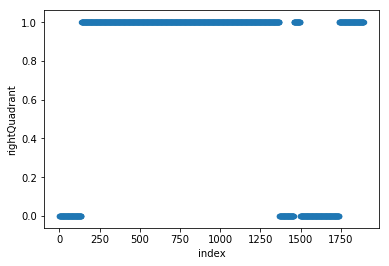

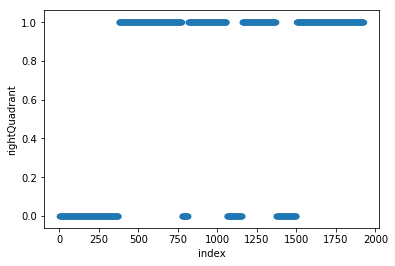

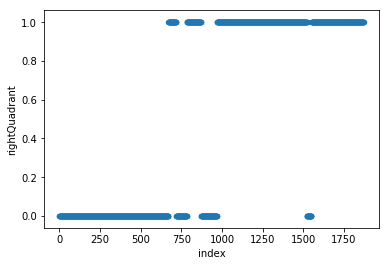

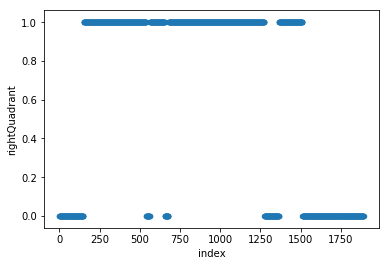

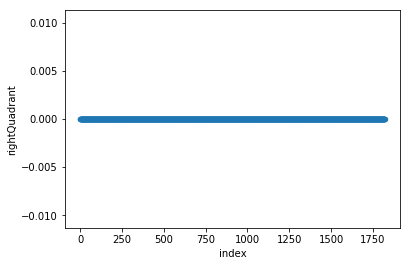

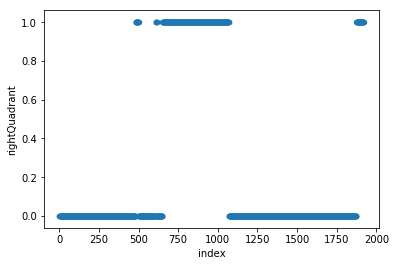

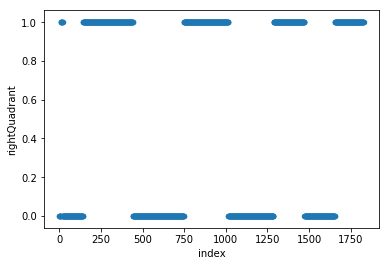

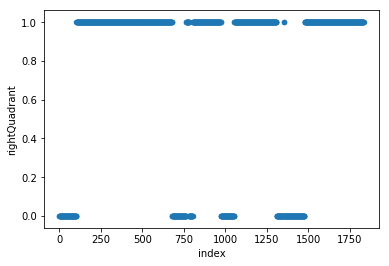

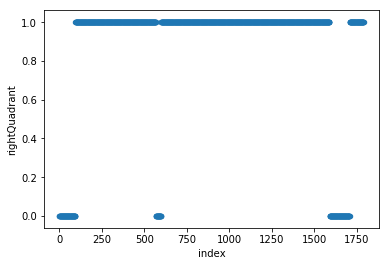

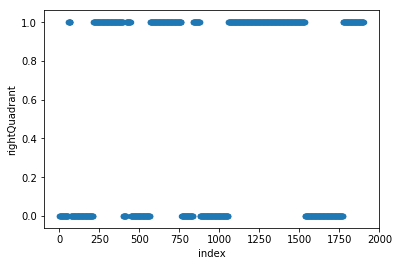

In [52]:
test = dfs[4]
print(test.head())
def inRightQuadrant(row):
    x = row['x']
    y = row['y']
    if 182*x + 219*y - 142686 > 0 and 432*x - 347*y - 77046 < 0:
        return 1
    return 0
proportion_spent = []
for df in dfs:   
#     df.plot(kind='scatter', x = 'x', y= 'y')
    df['rightQuadrant'] = df.apply(inRightQuadrant, axis=1)
    
#     df[df['rightQuadrant']].plot(kind='scatter', x = 'x', y= 'y')
    df.reset_index().plot(kind='scatter', x='index', y='rightQuadrant')
    proportion_spent.append(np.sum(df['rightQuadrant']) / df.shape[0])
print(proportion_spent)


In [71]:
x = zip(dfs, times, mouse_number, proportion_spent)

df = pd.DataFrame(np.array([mouse_number, proportion_spent, times]).T, columns=["mouse", "proportion_spent", "vid_length"])
df['time_spent'] = df['vid_length'].values * df['proportion_spent'].values
df.to_csv(r"C:\Users\vjj14\Desktop\DeepLabCut\watermaze-vj-2019-07-02\watermaze.csv")